# KoNLPy 텍스트 전처리

JDK & JPype1 & KoNLPy 설치명령어

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

환경변수 설정

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [50]:
# 대한민국 헌법 텍스트 가져오기

from konlpy.corpus import kolaw

const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc))  # 가져온 데이터의 type을 확인
print('문자의 개수', len(const_doc))
print(const_doc[:1000]) # 1000자만 출력

<class 'str'>
문자의 개수 18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.


**토크화 (Tokenizing) 진행**

형태소 단위로 토큰화 진행시 \n\n, 숫자, 조사와 같이 의미가 없는 토큰이 많아 명사만 추출하여 진행

In [51]:
# 형태소 단위로 tokenize

from konlpy.tag import Okt

t = Okt()
tokens_const_morphs = t.morphs(const_doc)

print('토큰의 개수:', len(tokens_const_morphs))
print('Token sample')
print(tokens_const_morphs[:20])

토큰의 개수: 8796
Token sample
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로']


In [52]:
# 형태소 단위로 tokenize 후 명사만 추출

tokens_const_nouns = t.nouns(const_doc)

print('토큰의 개수:', len(tokens_const_nouns))
print('Token sample')
print(tokens_const_nouns[:100])

토큰의 개수: 3882
Token sample
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


**불용어 제거**

책 원문에서는 불용어 제거 대신 한 글자로 된 명사는 의미를 찾기 힘들다고 판단하여 제거 하였지만 헌법 텍스트에서 '법'과 같은 글자를 빼기에는 의미가 퇴색된다고 판단하여 불용어 제거로 진행<br>
불용어 사전은 토큰화 되기전의 원문중 1000자의 문자와 토큰화 후 100개의 토큰을 참고하여 작성 후 다시 100개를 확인하여 재검토


In [53]:
 # stopword를 리스트로 정의
my_stopword = ['애', '로써', '더욱', '안', '입', '제', '장', '강', '것', '차', '밖', '함', '모든', '도로', '그', '이', '바', '정', '이제', '관', '때', '수', '위', '및']
result = [word for word in tokens_const_nouns if word not in my_stopword]

print('토큰의 개수:', len(result))
print('Token sample')
print(result[:100])

토큰의 개수: 3133
Token sample
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '민족', '단결', '공고', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '정치', '경제', '사회', '문화', '영역', '각인', '기회', '능력', '최고', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민', '보호', '의무', '대한민국', '영토', '한반도', '부속']


# 단어 빈도 그래프

`matplotlib`는 한글폰트를 기본적으로 지원하지 않는다. 따라서 폰트를 따로 설치하여 설정해야 한다.

In [ ]:
%%bash
apt-get install -y fonts-nanum
sudo fc-cache -fv
rm ~/.cache/matplotlib -rf

In [55]:
import matplotlib.pyplot as plt

In [56]:
plt.rc('font', family='NanumBarunGothic')   # 한글폰트 설정

In [57]:
# 딕셔너리로 각 단어의 빈도수 체크
const_cnt = dict()
for word in result:
    const_cnt[word] = const_cnt.get(word, 0) + 1

In [58]:
# 그래프 그리기 함수
def word_graph(cnt, max_words):
    
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1], reverse=True)
    print(sorted_w[:max_words])
    n, w = zip(*sorted_w[:max_words][::-1])     # 빈도수 상위 몇개의 단어를 추출하여 역순으로 정렬

    plt.barh(range(len(n)),w,tick_label=n)      # 수평 막대그래프 (단어의 가독성을 위함)
    #plt.savefig('bar.png')  # 필요한 경우, 그래프를 이미지 파일로 저장
    plt.show()

[('법률', 127), ('대통령', 83), ('국가', 73), ('국회', 68), ('국민', 61), ('헌법', 53), ('기타', 26), ('사항', 23), ('권리', 21), ('의원', 21), ('자유', 20), ('정부', 20), ('선거', 20), ('임명', 20), ('직무', 19), ('국무총리', 19), ('경제', 18), ('의무', 18), ('조직', 18), ('국회의원', 18)]


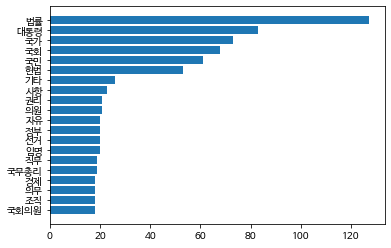

In [59]:
word_graph(const_cnt, max_words=20)

# 워드클라우드

`WordCloud` 또한 한글폰트 지원을 하지 않는다. 따라서, 위에서 쓴 한글폰트를 쓴다.

In [ ]:
!pip install wordcloud

대한민국 헌법 원문에 대한 워드클라우드

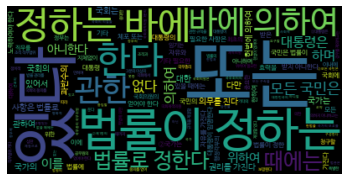

In [61]:
from wordcloud import WordCloud

# 워드 클라우드 이미지 생성 (내부 토큰화 작업)
wordcloud = WordCloud(font_path = 'NanumBarunGothic').generate(const_doc)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

텍스트 전처리 후의 대한민국 헌법 워드클라우드

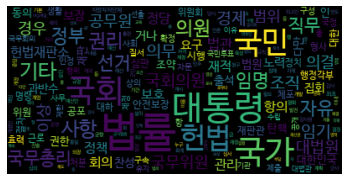

In [62]:
# 워드 클라우드 이미지 생성 (내부 토큰화 작업은 하지 않는다)
wordcloud = WordCloud(font_path = 'NanumBarunGothic').generate_from_frequencies(const_cnt)
# wordcloud.to_file("const.png") # 필요한 경우, 생성한 이미지를 파일로 저장

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()